A simple animation showing logistic regression at work

In [ ]:
#logistic regression example
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [ ]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

The dataset is composed by 100 random points in the square [0:1,0:1].
We divide points in two classes by a straight line passing from [.5,.5] and inclination "m". In this way, the two classes have more or less the same cardinality. Moreover, we artificially add (gaussian) noise to make the classification less precise. The amount of noise can be changed by the std parameter, corresponding to the gaussian standard deviation.

In [ ]:
def generate_data_set(m,dev=.05):
  x1 = np.random.rand(100)
  x2 = np.random.rand(100)
  y = (x2 - m*x1 - (1-m)/2) < 0
  #adding noise
  x1 += np.random.normal(size=100,scale=dev)
  x2 += np.random.normal(size=100,scale=dev)
  return (x1,x2,y)

In [ ]:
x1,x2,y = generate_data_set(-2/3)

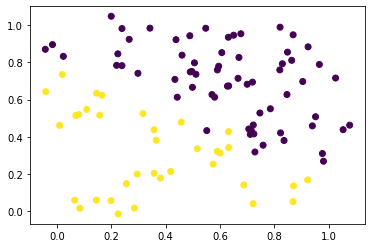

In [ ]:
fig = plt.figure()
plt.scatter(x1,x2,c=y)
line, = plt.plot([], [], lw=2)

In [ ]:
#gradient for logistic regression
def grad(x1,x2,label,prediction):
    diff = label - prediction
    dw0 = np.mean(diff)
    dw1 = np.mean(x1*diff)
    dw2 = np.mean(x2*diff)
    return(dw0,dw1,dw2)

In [ ]:
lr = 0.05
epochs = 2000

#step 1
a = np.random.normal()
b = np.random.normal()
c = np.random.normal()
params=[a,b,c]

In [ ]:
def init():
    #current approximation
    line.set_data([0,1],[a,a+b+c])
    return line,

def step(i):
    a,b,c=params
    pred = np.vectorize(sigmoid)(a+b*x1+c*x2)
    da,db,dc = grad(x1,x2,y,pred)
    if i%100==0:
      print("current loglikelyhood = {}".format(np.sum(pred*(y==1)+(1-pred)*(y==0))))
      print(a,b,c)
    params[0] = a + lr*da
    params[1] = b + lr*db
    params[2] = c + lr*dc
    ##### for animation
    line.set_data([0,1],[-a/c,-(a+b)/c])
    #time.sleep(.01)
    return line,

anim = animation.FuncAnimation(fig, step, init_func=init, frames=epochs, interval=1, blit=True, repeat=False)

In [ ]:
anim